In [44]:
import pandas as pd
import numpy as np

from IPython.display import Image
from sklearn.model_selection import train_test_split,cross_val_score
#from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import chi2_contingency
from scipy.stats import chi2

## conda install -c anaconda statsmodels
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

C:\Users\szabeen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\szabeen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [45]:
#Connect with pgadmin ( default database : postgres , password : yourpassword)
# !pip install psycopg2
import psycopg2
import pandas as pd
conn = psycopg2.connect(database="HR Analytics",user="postgres",  port = 5432, password="Aqureshi@1", host="localhost")
conn.autocommit = True
cur= conn.cursor()

In [46]:
data=pd.read_sql('Select * from finaldf',conn)
data

,global_emp_id,gender,capgemini_start_date,most_recent_hire_date,adjust_service_date,prior_service_date,original_hire_reason,employee_group,employee_sub_group,unified_grade,global_grade,designation,country,company,resource_type,employee_status,city,psa_code,personnel_area_short_name,operating_unit,org_id,org_name,business_area,sbu_code,sbu,bu_code,bu,sub_bu_code,sub_bu,community,service_line_code,service_line_description,position,termination_date,resignation_date,n1_emp_id,n1_emp_name,seconded_type,seconded_country,secondment_start_date,secondment_end_date,secondment_action_date,report_month,actual_dol,reported_dol,reported_month,exit_type,voluntary_leaver_ytd,exit_reason,reason_classification,regretted_not_regretted,resignation_submission_date,resign_month,flag,payposition_2021,leaves,tenure,bench_ageing,marital_status,education_score,ijp_90_days,months_since_last_promotion,rating_2019,rating_2020,rating_diff
0,9yVnRBaxysZs9V+PaHnhWw==,Male,5/2/2006,5/2/2006,5/2/2006,nan,nan,Standard,Sal FT OT Inelig,D1,D,Senior Manager,IN,Capgemini Tech Serv India,DSP,Active,Mumbai,IN11,Mumbai - SEZ - Airoli - CKP - II,IN45,IN454011,IN45-I&D Mgmt and others,I&D,15001269,I&D,15001270,I&D (Insights and data),15001278,I&D Mgmt and others,nan,TLC02,Global Sales Team,24003302,nan,nan,398,Sundeep Noel Dias,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,rXTr5FKU8VMbhGSPeVy8BA==,Female,12/2/2013,12/2/2013,12/2/2013,nan,nan,Standard,Sal FT OT Inelig,C2,C,Manager,IN,Capgemini Tech Serv India,CSS,Active,Gurgaon,IN94,Gurgaon - STPI - SPAZE Tech Park,IN25,IN254007,IN25-I&D DM,I&D,15001269,I&D,15001270,I&D (Insights and data),15001274,I&D DM,nan,ETL01,ETL,24024882,nan,nan,55886,Vineet Bansal,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,0.888772043,0.0,13.996180619725251,0.0,Marr.,53.0,nan,22.045627220271463,1.0,3.0,2.0
2,C+tnDDHaN82N7jbiDIcsHA==,Female,2/25/2013,2/25/2013,2/25/2013,nan,nan,Standard,Sal FT OT Inelig,B2,B,Consultant,IN,Capgemini Tech Serv India,CSS,Active,Chennai,IN69,Chennai - SEZ - MIPL,IN16,IN164013,IN16_I&D Cloud Data Platform,I&D,15001269,I&D,15001270,I&D (Insights and data),15001280,I&D Cloud Data Platform,nan,APSTST,Testing,24013590,nan,nan,61874,Manya Ajay Advani,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,0.6155625,0.1,0.19712930450317254,0.0,Marr.,53.0,nan,28.025216123534364,3.0,3.0,0.0
3,I5yzxSaSpasUcHYBD/lKVQ==,Male,10/29/2001,10/29/2001,10/29/2001,nan,nan,Standard,Sal FT OT Inelig,D1,D,Senior Manager,IN,Capgemini Tech Serv India,CSS,Active,Bangalore,IN30,Bangalore - SEZ - Divyashree - G 3 flr to 5 flr &,IN30,IN304006,IN30-I&D MDM,I&D,15001269,I&D,15001270,I&D (Insights and data),15001273,I&D MDM,nan,MDM02,Master Data Management,24016537,nan,nan,128626,Prasenjit Roy,nan,nan,nan,nan,nan,1,2021-07-14 00:00:00,2021-07-14 00:00:00,7.0,Resignation,Vol,Break in Career,Personal Reasons,nan,2021-04-16,4,0,0.8581287879999999,0.0,4.205425162734346,0.0,Marr.,53.0,nan,132.99657077147376,3.0,3.0,0.0
4,8xcP8L82flgY2QtfdoeIyA==,Male,8/19/2002,8/19/2002,8/19/2002,nan,nan,Standard,Sal FT OT Inelig,E2,E,Senior Director,IN,Capgemini Tech Serv India,CSS,Active,Mumbai,INDC,Mumbai - SEZ - Airoli - Block VI,INA8,INA84007,INA8-I&D DM,I&D,15001269,I&D,15001270,I&D (Insights and data),15001274,I&D DM,nan,DEL01,Delivery,24016540,nan,nan,1318,Narendra Bhosekar,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,0.904494015,0.0,11.869483972976859,0.0,Marr.,28.0,nan,121.00453808086408,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95221,i7VXFx/a0aVbaZaiIvwkqA==,Male,1/8/2021,1/8/2021,1/8/2021,nan,Experienced Hire,Standard,Sal FT OT Inelig,C2,C,Manager,IN,Capgemini Tech Serv India,CSS,Withdrawn,Bangalore,INCQ,Bangalore - SEZ - Div

In [47]:
import pandas as pd
data=pd.read_excel("C:/Users/szabeen/Downloads/postprocessing.xlsx")

In [57]:
data['marital_status'].value_counts()

Single    51519
Marr.     42408
Div.        235
Wid.        108
Name: marital_status, dtype: int64

In [49]:
# data=pd.read_csv(r'finalupdated1.csv')
# data.drop(['Unnamed: 0'],axis=1,inplace=True)
# print(data.shape)
# data.head()

In [50]:
data.columns

Index(['global_emp_id', 'gender', 'capgemini_start_date',
       'most_recent_hire_date', 'adjust_service_date', 'prior_service_date',
       'original_hire_reason', 'employee_group', 'employee_sub_group',
       'unified_grade', 'global_grade', 'designation', 'country', 'company',
       'resource_type', 'employee_status', 'city', 'psa_code',
       'personnel_area_short_name', 'operating_unit', 'org_id', 'org_name',
       'business_area', 'sbu_code', 'sbu', 'bu_code', 'bu', 'sub_bu_code',
       'sub_bu', 'community', 'service_line_code', 'service_line_description',
       'position', 'termination_date', 'resignation_date', 'n1_emp_id',
       'seconded_type', 'seconded_country', 'secondment_start_date',
       'secondment_end_date', 'secondment_action_date', 'report_month',
       'actual_dol', 'reported_dol', 'reported_month', 'exit_type',
       'voluntary_leaver_ytd', 'exit_reason', 'reason_classification',
       'regretted_not_regretted', 'resignation_submission_date',
       

In [58]:
df=data[['global_emp_id','gender','unified_grade','city','sub_bu','ijp_90_days','tenure','bench_ageing',
        'marital_status', 'education_score','leaves','flag','rating_2019','rating_2020',
       'months_since_last_promotion','payposition_2021','capgemini_start_date','report_month']]

In [52]:
df['ijp_90_days']=df['ijp_90_days'].astype(float)
df['tenure']=df['tenure'].astype(float)
df['payposition_2021']=df['payposition_2021'].astype(float)
df['months_since_last_promotion']=df['months_since_last_promotion'].astype(float)
df['leaves']=df['leaves'].astype(float)
df['education_score']=df['education_score'].astype(float)
df['bench_ageing']=df['bench_ageing'].astype(float)

In [53]:
df.shape

(95226, 18)

In [54]:
df.columns

Index(['global_emp_id', 'gender', 'unified_grade', 'city', 'sub_bu',
       'ijp_90_days', 'tenure', 'bench_ageing', 'marital_status',
       'education_score', 'leaves', 'flag', 'rating_2019', 'rating_2020',
       'months_since_last_promotion', 'payposition_2021',
       'capgemini_start_date', 'report_month'],
      dtype='object')

In [55]:
df.isnull().sum()

global_emp_id                      0
gender                             0
unified_grade                      0
city                               0
sub_bu                             0
ijp_90_days                    94530
tenure                          2171
bench_ageing                    2171
marital_status                   956
education_score                  955
leaves                         10943
flag                               0
rating_2019                      955
rating_2020                      955
months_since_last_promotion      955
payposition_2021                1109
capgemini_start_date               0
report_month                       0
dtype: int64

In [59]:
df['rating_2019']=df['rating_2019'].fillna(3)

In [60]:
df['rating_2020']=df['rating_2020'].fillna(3)

In [ ]:
# df['rating_2020'].value_counts()

In [ ]:
# df['rating_2020']=df['rating_2020'].replace('nan',3)

In [ ]:
# df['rating_2019']=df['rating_2019'].astype(int)

In [61]:
dummy=df.copy()

In [98]:
dummy.shape

(95226, 18)

In [99]:
df=dummy.copy()

In [100]:
df['capgemini_start_date'] = pd.to_datetime(df['capgemini_start_date'])
df['Cap_start_year']=df['capgemini_start_date'].dt.year

In [101]:
df['report_year']=2021
df['report_year'].value_counts()

2021    95226
Name: report_year, dtype: int64

<AxesSubplot:>

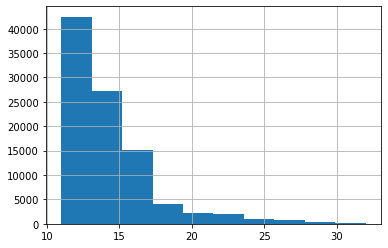

In [102]:
df['tenure_in_capgemini_yr']=df['report_year']-df['Cap_start_year']
df['tenure_in_capgemini_yr'].hist()

In [103]:
df.drop(['capgemini_start_date','report_year','Cap_start_year'],axis=1,
        inplace=True)

In [104]:
df.columns

Index(['global_emp_id', 'gender', 'unified_grade', 'city', 'sub_bu',
       'ijp_90_days', 'tenure', 'bench_ageing', 'marital_status',
       'education_score', 'leaves', 'flag', 'rating_2019', 'rating_2020',
       'months_since_last_promotion', 'payposition_2021', 'report_month',
       'tenure_in_capgemini_yr'],
      dtype='object')

In [105]:
df['payposition_2021']=df['payposition_2021'].fillna(df['payposition_2021'].median())

In [106]:
df['payposition_2021'].isnull().sum()

0

In [107]:
df['ijp_90_days'] = df['ijp_90_days'].fillna(0)

In [108]:
df['ijp_90_days'].value_counts()

0.0     94577
1.0       217
2.0       121
3.0        68
4.0        58
5.0        35
6.0        31
10.0       21
7.0        17
8.0        15
12.0        8
9.0         7
13.0        7
11.0        7
14.0        5
18.0        4
21.0        4
17.0        3
16.0        3
23.0        3
64.0        2
38.0        2
34.0        2
19.0        2
22.0        2
20.0        1
15.0        1
24.0        1
73.0        1
51.0        1
Name: ijp_90_days, dtype: int64

In [109]:
df.isnull().sum()

global_emp_id                      0
gender                             0
unified_grade                      0
city                               0
sub_bu                             0
ijp_90_days                        0
tenure                          2171
bench_ageing                    2171
marital_status                   956
education_score                  955
leaves                         10943
flag                               0
rating_2019                        0
rating_2020                        0
months_since_last_promotion      955
payposition_2021                   0
report_month                       0
tenure_in_capgemini_yr             0
dtype: int64

In [110]:
df['marital_status'].isnull().sum()

956

In [111]:
df['marital_status'] = df['marital_status'].fillna('Not Available')
print(df['marital_status'].isna().sum())
print(df['marital_status'].value_counts())

0
Single           51519
Marr.            42408
Not Available      956
Div.               235
Wid.               108
Name: marital_status, dtype: int64


In [112]:
df['education_score'] = df['education_score'].fillna(53)
df['education_score']=df['education_score'].replace(0,53)
df['education_score']=df['education_score'].replace(4,85)
df['education_score']=df['education_score'].replace(28,81)
df['education_score']=df['education_score'].replace(32,85)
df['education_score'].value_counts()

53.0    77762
81.0    17420
85.0       44
Name: education_score, dtype: int64

In [113]:
df['months_since_last_promotion'] = df['months_since_last_promotion'].fillna(0)
print(df['months_since_last_promotion'].isna().sum())
print(df['months_since_last_promotion'].value_counts())

0
328.548841    63340
1.971293       1128
4.993942       1029
0.000000        955
0.985647        922
              ...  
127.969774        1
48.953777         1
8.476560          1
123.994333        1
8.016592          1
Name: months_since_last_promotion, Length: 357, dtype: int64


In [ ]:
# df['leaves'].to_list()

In [114]:
df['leaves'] = df["leaves"].fillna(0)


In [ ]:
# df.drop(['leaveCount(last_90_days)'],axis=1,inplace=True)

In [115]:
df.columns

Index(['global_emp_id', 'gender', 'unified_grade', 'city', 'sub_bu',
       'ijp_90_days', 'tenure', 'bench_ageing', 'marital_status',
       'education_score', 'leaves', 'flag', 'rating_2019', 'rating_2020',
       'months_since_last_promotion', 'payposition_2021', 'report_month',
       'tenure_in_capgemini_yr'],
      dtype='object')

In [116]:
df.isna().sum()

global_emp_id                     0
gender                            0
unified_grade                     0
city                              0
sub_bu                            0
ijp_90_days                       0
tenure                         2171
bench_ageing                   2171
marital_status                    0
education_score                   0
leaves                            0
flag                              0
rating_2019                       0
rating_2020                       0
months_since_last_promotion       0
payposition_2021                  0
report_month                      0
tenure_in_capgemini_yr            0
dtype: int64

In [ ]:
# df['rating_2019']=df['rating_2019'].astype(int)
# df['rating_2020']=df['rating_2020'].astype(int)

In [ ]:
# df['rating_2019']=df['rating_2019'].fillna(3)
# df(['rating_2020'].replace (np.nan, 3),inplace=True)

In [ ]:
# df['rating_2019']=df['rating_2019'].replace (np.nan, 3)
# df['rating_2020']=df['rating_2020'].replace (np.nan, 3)

In [ ]:
# df['rating_2019']=df['rating_2019'].replace(['Exceptional','Needs Attention','Good','Not Applicable','Not Available','-','1','2','3','4','5','Not Applicable ',np.nan],[1,5,3,3,3,3,1,2,3,4,5,3,3])

In [ ]:
# df.dtypes

In [117]:
df['rating_2019']=df['rating_2019'].astype(float)

In [118]:
df['rating_2020']=df['rating_2020'].astype(float)

In [ ]:
# df['rating_2020']=df['rating_2020'].replace(['Not Applicable','-','1','2','3','4','5'],[3,3,1,2,3,4,5])

In [119]:
df['Average_Rating']= (( df['rating_2019'] + df['rating_2020'])/2).round(2)

In [120]:
df['rating_diff']=df['rating_2020']-df['rating_2019']

In [121]:
df.drop(['rating_2019','rating_2020'],axis=1,inplace=True)

In [122]:
df['tenure'] = df['tenure'].fillna(df['tenure'].median())
print(df['tenure'].isna().sum())
print(df['tenure'].value_counts())

0
0.000000    13788
3.482618     2330
0.985647     1571
1.971293     1508
1.905583     1421
            ...  
1.183899        1
0.084437        1
4.732089        1
3.105772        1
0.541366        1
Name: tenure, Length: 4501, dtype: int64


In [123]:
df['bench_ageing'] = df['bench_ageing'].fillna(df['bench_ageing'].median())
print(df['bench_ageing'].isna().sum())
print(df['bench_ageing'].value_counts())

0
0.000000     94888
0.010514         9
2.989794         9
0.000329         8
0.020370         8
             ...  
23.885501        1
23.819791        1
4.665394         1
1.379905         1
2.858375         1
Name: bench_ageing, Length: 143, dtype: int64


In [ ]:
# df['bench_ageing'].to_list()

In [ ]:
#df=df.drop('bench_ageing',axis=1)

In [124]:
df.isna().sum()

global_emp_id                  0
gender                         0
unified_grade                  0
city                           0
sub_bu                         0
ijp_90_days                    0
tenure                         0
bench_ageing                   0
marital_status                 0
education_score                0
leaves                         0
flag                           0
months_since_last_promotion    0
payposition_2021               0
report_month                   0
tenure_in_capgemini_yr         0
Average_Rating                 0
rating_diff                    0
dtype: int64

In [37]:
df['sub_bu'] = df['sub_bu'].replace(['I and D','I&D SAP_IN','I&D Data Validation_IN','Not Available'],['I&D','I&D SAP','I&D Data Validation','I&D'])
df['sub_bu'].value_counts()

<ipython-input-37-d6e733f249c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sub_bu'] = df['sub_bu'].replace(['I and D','I&D SAP_IN','I&D Data Validation_IN','Not Available'],['I&D','I&D SAP','I&D Data Validation','I&D'])


BPS Cloud Data Platform    21429
BPS Oracle                 18807
BPS Big Data               13543
BPS Core BI                13339
BPS DM                     12351
BPS MDM                     5090
BPS DS&A                    4196
BPS ECM                     3261
BPS Mkt Services & COEs     1239
BPS Mgmt and others         1236
BPS Data Validation          633
BPS Data Validation_IN        86
MyH Default                    8
BPS DSA                        6
BPS Oracle_IN                  1
I&D                            1
Name: sub_bu, dtype: int64

In [125]:
df=df.rename({'flag':'Employee_Status'},axis=1)

In [126]:
df.dtypes

global_emp_id                   object
gender                          object
unified_grade                   object
city                            object
sub_bu                          object
ijp_90_days                    float64
tenure                         float64
bench_ageing                   float64
marital_status                  object
education_score                float64
leaves                         float64
Employee_Status                  int64
months_since_last_promotion    float64
payposition_2021               float64
report_month                     int64
tenure_in_capgemini_yr           int64
Average_Rating                 float64
rating_diff                    float64
dtype: object

In [127]:
df.shape

(95226, 18)

In [90]:
df.columns

Index(['global_emp_id', 'gender', 'unified_grade', 'city', 'sub_bu',
       'ijp_90_days', 'tenure', 'bench_ageing', 'marital_status',
       'education_score', 'leaves', 'Employee_Status',
       'months_since_last_promotion', 'payposition_2021', 'report_month',
       'tenure_in_capgemini_yr', 'Average_Rating', 'rating_diff'],
      dtype='object')

In [61]:
# df.drop(['months_since_last_Promotion'],axis=1,inplace=True)

In [128]:
dt = df.copy()
dff = df.copy()
dtt=df.copy()
print(dt.shape)
print(dff.shape)
df=df.drop(['report_month'],axis=1)

(95226, 18)
(95226, 18)


In [129]:
df.shape

(95226, 17)

In [93]:
df.columns

Index(['global_emp_id', 'gender', 'unified_grade', 'city', 'sub_bu',
       'ijp_90_days', 'tenure', 'bench_ageing', 'marital_status',
       'education_score', 'leaves', 'Employee_Status',
       'months_since_last_promotion', 'payposition_2021',
       'tenure_in_capgemini_yr', 'Average_Rating', 'rating_diff'],
      dtype='object')

In [130]:
df.isnull().sum()

global_emp_id                  0
gender                         0
unified_grade                  0
city                           0
sub_bu                         0
ijp_90_days                    0
tenure                         0
bench_ageing                   0
marital_status                 0
education_score                0
leaves                         0
Employee_Status                0
months_since_last_promotion    0
payposition_2021               0
tenure_in_capgemini_yr         0
Average_Rating                 0
rating_diff                    0
dtype: int64

In [62]:
for i in df.columns:
    print(i)

global_emp_id
gender
unified_grade
city
sub_bu
ijp_90_days
tenure
bench_ageing
marital_status
education_score
leaves
Employee_Status
months_since_last_promotion
payposition_2021
tenure_in_capgemini_yr
Average_Rating
rating_diff


In [63]:
# #Create table with all the required columns & assign the dtype 

# cur.execute("""CREATE TABLE preprocessed_file (
# global_emp_id varchar(50),
# gender varchar(50),
# unified_grade varchar(50),
# city varchar(50),
# sub_bu varchar(50),
# ijp_90_days varchar(50),
# tenure varchar(50),
# bench_ageing varchar(50),
# marital_status varchar(50),
# education_score varchar(50),
# leaves varchar(50),
# Employee_Status varchar(50),
# months_since_last_promotion varchar(50),
# payposition_2021 varchar(50),
# tenure_in_capgemini_yr varchar(50),
# Average_Rating varchar(50),
# rating_diff varchar(50)

# )""")
# conn.commit()

DuplicateTable: relation "preprocessed_file" already exists


In [ ]:
df.shape

In [ ]:
# ### Insert rows from 0 to 22
# %time
# for index, row in df.iterrows():
#     insertdata =  "('"+str(row[0])+"','"+str(row[1])+"','"+str(row[2])+"','"+str(row[3])+"','"+str(row[4])+"','"+str(row[5])+"','"+str(row[6])+"','"+str(row[7])+"','"+str(row[8])+"','"+str(row[9])+"','"+str(row[10])+"','"+str(row[11])+"','"+str(row[12])+"','"+str(row[13])+"','"+str(row[14])+"','"+str(row[15])+"','"+str(row[16])+"')"
#         #print( "row inserted:", insertdata)
#     try:
#         cur.execute("INSERT INTO preprocessed_file values "+insertdata)
    
#     except psycopg2.IntegrityError:
#         print("Row")
# #         cur.execute("INSERT INTO dd VALUES  "+insertdata+" ON CONFLICT (GGID) do update set role = " +"('"+str(row[1])+"')"+ " , a= "+"('"+str(row[2])+"')")
        
# #         a=pd.read_sql("select count(*) from his where GGID = "+"('"+str(row[0])+"')",conn)
# #         c=a['count'][0] + 1

# #         insertdata1 =  "('"+str(row[0])+"','"+str(c)+"','"+str(row[1])+"','"+str(row[2])+"')"
# #         cur.execute("INSERT INTO his values "+insertdata1)
        
#         pass
    
#     except Exception as e:
#         print( "some insert error:", e)
#     conn.commit()

In [ ]:
#gid= 3vU/v9lOfo9dYM7fv17JCg==
gid = preprocessed_file.iloc[0,0:1]

In [ ]:
gid = "'{}'".format(gid)

In [ ]:
gid

In [ ]:
preprocessed_file=pd.read_sql("Select gender from preprocessed_file where global_emp_id='3vU/v9lOfo9dYM7fv17JCg==' LIMIT 1 --skip-column-names",conn)
# l=preprocessed_file[preprocessed_file['global_emp_id']='vU/v9lOfo9dYM7fv17JCg==']
preprocessed_file.gender[0]

In [ ]:
!pip install flask

In [ ]:
import numpy as np
import psycopg2
import pandas as pd
from flask import Flask, request, jsonify, render_template
import pickle

app = Flask(__name__)
@app.route('/fetch_data', methods=['POST', 'GET'])
def fetch_data():
    if request.method == "POST":
        conn = psycopg2.connect(database="HR Analytics",user="postgres", port = 5432, password="Aqureshi@1", host="localhost")
        conn.autocommit = True
        #cursor= conn.cursor()   
    
        global_emp_id = request.form.get('global_emp_id')
        #global_emp_id = "'{}'".format(global_emp_id)
         
        if global_emp_id != None:

            result=pd.read_sql("select * from preprocessed_file where global_emp_id IN (global_emp_id) limit 1",conn)
            result=result.gender[0]
        else:
            result  = ''
        #data = cursor.fetchone()
        #data=pd.DataFrame(data)    
        #cursor.close()
        conn.close()
        return render_template('index.html',gender_df=result)

In [ ]:
global_emp_id

In [ ]:
import numpy as np
import psycopg2
import pandas as pd
from flask import Flask, request, jsonify, render_template
import pickle

app = Flask(__name__)
model = pickle.load(open('model.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/fetch_data', methods=['POST', 'GET'])
def fetch_data():
    conn = psycopg2.connect(database="HR Analytics",user="postgres", port = 5432, password="Aqureshi@1", host="localhost")
    conn.autocommit = True
    #cursor= conn.cursor()
    global_emp_id = request.form['global_emp_id']
    global_emp_id = "'{}'".format(global_emp_id)
    if global_emp_id != None:
        result=pd.read_sql("select gender from preprocessed_file where global_emp_id = '3vU/v9lOfo9dYM7fv17JCg==' limit 1",conn)
        result=result.gender[0]
    else:
        result  = ''
    #data = cursor.fetchone()
    #data=pd.DataFrame(data)    
    #cursor.close()
    conn.close()
    return render_template('index.html',gender_df=result)
@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    prediction = model.predict(final_features)
    prob = model.predict_proba(final_features)
    output='{0:.{1}f}'.format(prob[0][1], 2)

    if output>str(0.5):
        return render_template('index.html',prediction_text='Status of Employee is "1" - Means Employee has more chances to attrite and Attrition probability is  {}'.format(output))
    else:
        return render_template('index.html',prediction_text='Status of Employee is "0" -Means Employee has more chances to retain and Retention probability is  {}'.format(output))
    

@app.route('/predict_api',methods=['POST'])
def predict_api():
    '''
    For direct API calls trought request
    '''
    data = request.get_json(force=True)
    prediction = model.predict([np.array(list(data.values()))])

    output = prediction[0]
    return jsonify(output)

if __name__ == "__main__":
    app.run(debug=True)


In [3]:
import psycopg2
import pandas as pd
conn = psycopg2.connect(database="HR Analytics",user="postgres",  port = 5432, password="Aqureshi@1", host="localhost")
conn.autocommit = True
cur= conn.cursor()
result=cur.execute("SELECT * FROM preprocessed_file;")

In [ ]:
#df.drop('Payposition_2021',inplace=True,axis=1)

In [131]:
y=df['Employee_Status']
x=df.drop(['Employee_Status','global_emp_id'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(66658, 15)
(28568, 15)
(66658,)
(28568,)


In [132]:
df=df.drop('global_emp_id',axis=1)
df=df.drop(['Employee_Status'],axis=1)

In [69]:
x_train.head()

,gender,unified_grade,city,sub_bu,ijp_90_days,tenure,bench_ageing,marital_status,education_score,leaves,months_since_last_promotion,payposition_2021,tenure_in_capgemini_yr,Average_Rating,rating_diff
87357,Female,B1,Hyderabad,I&D DS&A,0.0,2.989794,0.0,Marr.,53.0,2.000000,328.548841,0.918997,0,3.0,0.0
953,Male,B2,Hyderabad,I&D Cloud Data Platform,0.0,0.164274,0.0,Marr.,53.0,0.166667,328.548841,1.071355,2,3.0,0.0
4188,Female,E2,Bangalore,I&D Mkt Services & COEs,0.0,28.295283,0.0,Marr.,53.0,0.142857,328.548841,1.174954,3,2.5,1.0
22914,Male,C1,Mumbai,I&D ECM,0.0,0.591388,0.0,Marr.,81.0,0.142857,328.548841,1.222445,5,1.5,1.0
15351,Female,B1,Mumbai,I&D Big Data,0.0,1.462042,0.0,Single,53.0,0.388889,328.548841,0.597720,6,2.5,1.0


In [133]:
import catboost as cb1

cat_att, num_att = [], []

for col in df.columns:
    if df[col].dtypes != object:
        num_att.append(col)

    else:
        cat_att.append(col)

print(num_att, '\n\n', cat_att)


['ijp_90_days', 'tenure', 'bench_ageing', 'education_score', 'leaves', 'months_since_last_promotion', 'payposition_2021', 'tenure_in_capgemini_yr', 'Average_Rating', 'rating_diff'] 

 ['gender', 'unified_grade', 'city', 'sub_bu', 'marital_status']


In [134]:
def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):
 
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))
 
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

In [135]:
c0 = 95226/(2*76180)

c1 = 95226/(2*19046)

print(c0,c1)

0.6250065634024679 2.499894991074241


In [136]:
# Building a model with class_weights=dict({1,4}) in proportion with Target column outcomes
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix,f1_score
 
#cb1= CatBoostClassifier(class_weights=(1,20),cat_features=cat_att )
#cb1= CatBoostClassifier(class_weights=(1,12),cat_features=cat_att,l2_leaf_reg=7,depth=7,mvs_reg=0.02)
cb1=CatBoostClassifier(class_weights=(1,12),cat_features=cat_att,l2_leaf_reg=7,depth=7,mvs_reg=0.5)

# Fit the model to training data
cb1.fit(x_train, y_train,verbose=False)
 
# predict the label on the traning data
y_pred_train = cb1.predict(x_train)
 
# predict the model on the test data
y_pred_test = cb1.predict(x_test)
 
print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.963575264784422
Test Accuracy: 0.9513091570988519


In [149]:
# x_test.to_csv('xtest1.csv',index=False)

In [137]:
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix,f1_score
# printing classification report
classifcation_report_train_test(y_train, y_pred_train, y_test, y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9901    0.9724    0.9812     65099
           1     0.3407    0.5959    0.4335      1559

    accuracy                         0.9636     66658
   macro avg     0.6654    0.7841    0.7073     66658
weighted avg     0.9750    0.9636    0.9684     66658


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9815    0.9684    0.9749     27888
           1     0.1618    0.2500    0.1964       680

    accuracy                         0.9513     28568
   macro avg     0.5716    0.6092    0.5857     28568
weighted avg     0.9620    0.9513    0.9564     28568



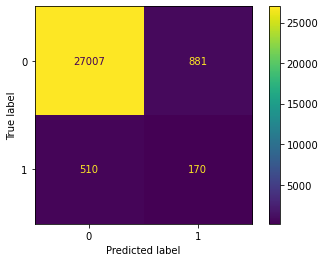

In [138]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [139]:
import pickle
pickle.dump(cb1,open('model_1705.pkl','wb'))
# model = pickle.load(open('model.pkl','rb'))

In [55]:
# predefined Functions for Model Building
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    #Define size of bar plot
    plt.figure(figsize=(6,10))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type  +  'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

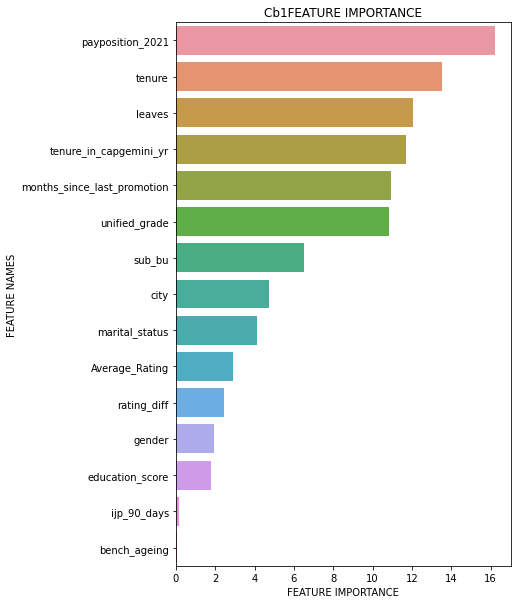

In [56]:
plot_feature_importance(cb1.feature_importances_,x_train.columns,'Cb1')

In [57]:
#Create a DataFrame using a Dictionary
df={'feature_names':x_train.columns,'feature_importance':cb1.feature_importances_}
fi_df = pd.DataFrame(df)
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
fi_df

,feature_names,feature_importance
11,payposition_2021,16.203843
5,tenure,13.510811
9,leaves,12.058980
12,tenure_in_capgemini_yr,11.689853
10,months_since_last_promotion,10.924962
1,unified_grade,10.814670
3,sub_bu,6.537539
2,city,4.759247
7,marital_status,4.136059
13,Average_Rating,2.897317


In [140]:
dff.shape
dt.shape

(95226, 18)

In [141]:
dff.drop(['global_emp_id', 'Employee_Status','report_month'],axis=1, inplace=True)
print(dff.shape)

(95226, 15)


In [142]:
#geting prediction output from the model
pred=cb1.predict(dff)
dt['pred']=pred
# getting prediction probabilities from the model
churn_proba = cb1.predict_proba(dff)
churn_proba.shape

(95226, 2)

In [143]:
# Renaming the output predicted columns
churn_proba=pd.DataFrame(churn_proba)
churn_proba.rename(columns = {0:'Retention_Probability', 1:'Termination_Probability'}, inplace = True)
dt['Retention_Probability']= churn_proba['Retention_Probability']
dt['Termination_Probability'] = churn_proba['Termination_Probability']
dt.shape

(95226, 21)

In [144]:
x = dt.sort_values('report_month').drop_duplicates(['global_emp_id'], keep='last')
x.shape

(13036, 21)

In [145]:
x

,global_emp_id,gender,unified_grade,city,sub_bu,ijp_90_days,tenure,bench_ageing,marital_status,education_score,leaves,Employee_Status,months_since_last_promotion,payposition_2021,report_month,tenure_in_capgemini_yr,Average_Rating,rating_diff,pred,Retention_Probability,Termination_Probability
3504,InHiXP3QzlP/dDonpXBLEQ==,Female,B1,Bangalore,BPS Oracle,0.0,5.716750,0.0,Single,53.0,4.000000,1,13.010534,0.817286,1,16,2.5,1.0,1,0.338173,0.661827
3633,Un0LA6Qm/rEk1rJ0fw1G7A==,Female,B1,Chennai,BPS DM,0.0,15.014682,0.0,Single,53.0,3.333333,1,10.020740,0.876607,1,15,1.0,0.0,1,0.250624,0.749376
3397,q4RW8REau55Z+VDSVUk8Kg==,Male,B1,Chennai,BPS DM,0.0,0.985647,0.0,Single,53.0,1.333333,1,16.033183,0.973095,1,16,2.0,0.0,1,0.479402,0.520598
3396,P3C64IhQ6zYqe3o7+IPZQA==,Male,B1,Bangalore,BPS Cloud Data Platform,0.0,4.008296,0.0,Single,53.0,1.000000,1,16.033183,0.860715,1,16,3.0,0.0,1,0.455713,0.544287
3353,Gfo1jvsM/JfVHSgc+RCg4w==,Male,C1,Chennai,BPS DM,0.0,3.482618,0.0,Not Available,53.0,0.000000,0,0.000000,0.927178,1,16,3.0,0.0,0,0.975763,0.024237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88320,3sbV4DI0C//B+wNkTTgdcA==,Female,A4,Bangalore,BPS Cloud Data Platform,0.0,0.000000,0.0,Single,53.0,1.000000,0,328.548841,0.927178,12,12,3.0,0.0,0,0.975408,0.024592
88321,wBLfu93Ah4vHL9CrO1ZmFA==,Female,A4,Bangalore,BPS Cloud Data Platform,0.0,1.051356,0.0,Single,53.0,1.000000,0,328.548841,0.927178,12,12,3.0,0.0,0,0.972950,0.027050
88322,2Uqhy8NxWWZdEtmDj2Xu9g==,Male,A4,Bangalore,BPS Big Data,0.0,1.215631,0.0,Single,53.0,3.000000,0,328.548841,0.927178,12,12,3.0,0.0,0,0.984455,0.015545
88344,DSWlm65tlN0a2TKlFt8DLQ==,Male,A4,Bangalore,BPS Cloud Data Platform,0.0,2.891230,0.0,Single,53.0,2.500000,0,328.548841,0.927178,12,12,3.0,0.0,0,0.974206,0.025794


In [146]:
x.to_csv('classification_output1705.csv')

In [447]:
# !pip install shap

In [147]:
# Import libraries for Shap Analysis
from catboost import Pool
import shap
shap.initjs()

In [148]:
print(dtt.shape)
df1=dtt.copy()
df1.shape

(95226, 18)


(95226, 18)

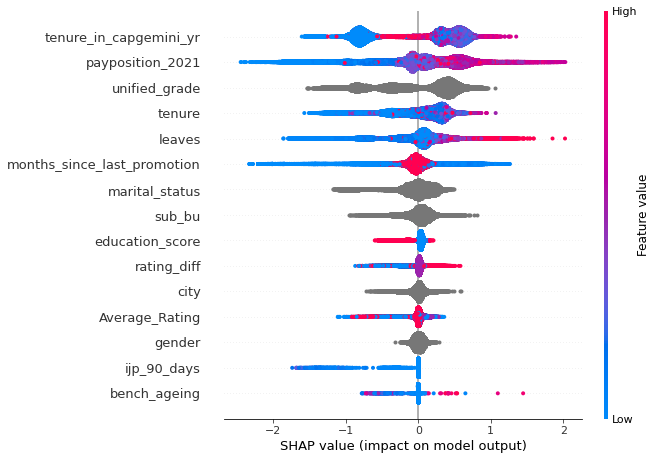

In [149]:
# import shap
# shaply analysis
dff.shape
# explaining the Analysis of the Model
explainer = shap.TreeExplainer(cb1)
shap_values = explainer.shap_values(Pool(dff, cat_features=cat_att))
shap.summary_plot(shap_values, dff)

In [150]:
z=pd.DataFrame(shap_values)
z.columns=dff.columns
z['global_emp_id']=df1[['global_emp_id']]
z['report_month']=df1[['report_month']]
z.shape

(95226, 17)

In [151]:

y = z.sort_values('report_month').drop_duplicates(['global_emp_id'], keep='last')

y.shape



(13036, 17)

In [153]:
y.to_csv('shap_output1705.csv')

In [70]:
x.head()

,global_emp_id,gender,unified_grade,city,sub_bu,ijp_90_days,tenure,bench_ageing,marital_status,education_score,leaves,Employee_Status,months_since_last_promotion,payposition_2021,report_month,tenure_in_capgemini_yr,Average_Rating,rating_diff,pred,Retention_Probability,Termination_Probability
3504,InHiXP3QzlP/dDonpXBLEQ==,Male,B1,Mumbai,I&D SAP,0.0,5.716750,0.0,Single,53.0,4.000000,1,13.010534,0.817286,1,4,2.5,1.0,1,0.272081,0.727919
3633,Un0LA6Qm/rEk1rJ0fw1G7A==,Male,B1,Bangalore,I&D DM,0.0,15.014682,0.0,Single,53.0,3.333333,1,10.020740,0.876607,1,3,1.0,0.0,1,0.327123,0.672877
3397,q4RW8REau55Z+VDSVUk8Kg==,Male,B1,Bangalore,I&D DM,0.0,0.985647,0.0,Single,53.0,1.333333,1,16.033183,0.973095,1,4,2.0,0.0,1,0.453057,0.546943
3396,P3C64IhQ6zYqe3o7+IPZQA==,Female,B1,Mumbai,I&D Cloud Data Platform,0.0,4.008296,0.0,Single,53.0,1.000000,1,16.033183,0.860715,1,4,3.0,0.0,0,0.563594,0.436406
3353,Gfo1jvsM/JfVHSgc+RCg4w==,Male,C2,Bangalore,I&D DM,0.0,3.482618,0.0,Not Available,53.0,0.000000,0,0.000000,0.927178,1,4,3.0,0.0,0,0.984997,0.015003


In [71]:
y.head()

,gender,unified_grade,city,sub_bu,ijp_90_days,tenure,bench_ageing,marital_status,education_score,leaves,months_since_last_promotion,payposition_2021,tenure_in_capgemini_yr,Average_Rating,rating_diff,global_emp_id,report_month
3504,0.079847,0.273943,0.010543,0.122603,0.005520,0.480480,0.001075,0.233033,0.057965,0.754162,0.349583,0.207153,0.575483,0.107145,0.141392,InHiXP3QzlP/dDonpXBLEQ==,1
3633,0.017945,0.302536,0.037227,0.163432,0.005023,0.322310,0.001656,0.252174,0.075163,0.371880,0.439265,0.459023,0.568364,0.129915,-0.008852,Un0LA6Qm/rEk1rJ0fw1G7A==,1
3397,0.026177,0.328257,0.001686,0.049570,0.005230,-0.067107,0.002350,0.303862,0.084694,0.319416,0.537115,0.246327,0.640790,0.120605,0.005191,q4RW8REau55Z+VDSVUk8Kg==,1
3396,-0.140995,0.218410,-0.039127,0.036515,0.005315,0.341979,0.001564,0.227082,0.062635,0.390431,0.448732,0.116667,0.555838,-0.060622,-0.004346,P3C64IhQ6zYqe3o7+IPZQA==,1
3353,0.022769,-0.331361,-0.033242,0.057818,0.005558,0.278752,0.001305,-1.329266,0.000436,0.037444,-0.970099,-0.049475,0.556940,-0.020641,0.004508,Gfo1jvsM/JfVHSgc+RCg4w==,1


In [72]:
x.columns

Index(['global_emp_id', 'gender', 'unified_grade', 'city', 'sub_bu',
       'ijp_90_days', 'tenure', 'bench_ageing', 'marital_status',
       'education_score', 'leaves', 'Employee_Status',
       'months_since_last_promotion', 'payposition_2021', 'report_month',
       'tenure_in_capgemini_yr', 'Average_Rating', 'rating_diff', 'pred',
       'Retention_Probability', 'Termination_Probability'],
      dtype='object')

In [634]:
#Create table with all the required columns & assign the dtype 

cur.execute("""CREATE TABLE classification_output (
global_emp_id text,
gender  VARCHAR (50),
unified_grade  VARCHAR (50),
city text,
sub_bu VARCHAR (50),
ijp_90_days VARCHAR (50),
tenure VARCHAR (50),
bench_ageing VARCHAR (50),
marital_status VARCHAR (50),
education_score VARCHAR (50),
leaves VARCHAR (50),
employee_status varchar (2),
months_since_last_promotion VARCHAR (50),
payposition_2021 VARCHAR (50),
report_month varchar(4),
tenure_in_capgemini_yr varchar(50),
average_rating varchar(20),
rating_diff VARCHAR (50),
pred varchar(50),
retention_probability varchar(50), 
termination_probability varchar(50)
)""")
conn.commit()

In [652]:
# cur.execute("DROP TABLE shap_output")

In [73]:
x.shape

(13036, 21)

In [637]:

### Insert rows from 0 to 22
%time
for index, row in x.iterrows():
    insertdata =  "('"+str(row[0])+"','"+str(row[1])+"','"+str(row[2])+"','"+str(row[3])+"','"+str(row[4])+"','"+str(row[5])+"','"+str(row[6])+"','"+str(row[7])+"','"+str(row[8])+"','"+str(row[9])+"','"+str(row[10])+"','"+str(row[11])+"','"+str(row[12])+"','"+str(row[13])+"','"+str(row[14])+"','"+str(row[15])+"','"+str(row[16])+"','"+str(row[17])+"','"+str(row[18])+"','"+str(row[19])+"','"+str(row[20])+"' )"
        #print( "row inserted:", insertdata)
    try:
        cur.execute("INSERT INTO classification_output values "+insertdata)
    
    except psycopg2.IntegrityError:
        print("Row")
#         cur.execute("INSERT INTO dd VALUES  "+insertdata+" ON CONFLICT (GGID) do update set role = " +"('"+str(row[1])+"')"+ " , a= "+"('"+str(row[2])+"')")
        
#         a=pd.read_sql("select count(*) from his where GGID = "+"('"+str(row[0])+"')",conn)
#         c=a['count'][0] + 1

#         insertdata1 =  "('"+str(row[0])+"','"+str(c)+"','"+str(row[1])+"','"+str(row[2])+"')"
#         cur.execute("INSERT INTO his values "+insertdata1)
        
        pass
    
    except Exception as e:
        print( "some insert error:", e)
    conn.commit()

Wall time: 0 ns


In [74]:
classification_output=pd.read_sql('Select * from classification_output',conn)

In [75]:
classification_output

,global_emp_id,gender,unified_grade,city,sub_bu,ijp_90_days,tenure,bench_ageing,marital_status,education_score,leaves,employee_status,months_since_last_promotion,payposition_2021,report_month,tenure_in_capgemini_yr,average_rating,rating_diff,pred,retention_probability,termination_probability
0,InHiXP3QzlP/dDonpXBLEQ==,Male,B1,Mumbai,I&D SAP,0.0,5.716749830592004,0.0,Single,53.0,4.0,1,13.010534097209387,0.8172864409999999,1,4,2.5,1.0,1,0.27208133976728666,0.7279186602327133
1,Un0LA6Qm/rEk1rJ0fw1G7A==,Male,B1,Bangalore,I&D DM,0.0,15.014682026324975,0.0,Single,53.0,3.333333333333333,1,10.02073964557794,0.87660678,1,3,1.0,0.0,1,0.32712343647049535,0.6728765635295046
2,q4RW8REau55Z+VDSVUk8Kg==,Male,B1,Bangalore,I&D DM,0.0,0.9856465225158628,0.0,Single,53.0,1.3333333333333333,1,16.033183432924698,0.973094915,1,4,2.0,0.0,1,0.45305749521572913,0.5469425047842709
3,P3C64IhQ6zYqe3o7+IPZQA==,Female,B1,Mumbai,I&D Cloud Data Platform,0.0,4.0082958582311745,0.0,Single,53.0,1.0,1,16.033183432924698,0.860715254,1,4,3.0,0.0,0,0.5635937398530892,0.43640626014691075
4,Gfo1jvsM/JfVHSgc+RCg4w==,Male,C2,Bangalore,I&D DM,0.0,3.4826177128893816,0.0,Not Available,53.0,0.0,0,0.0,0.927177535,1,4,3.0,0.0,0,0.984997075577334,0.015002924422666005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13031,YCD/dJyk2c+O2IHyGTmOkA==,Male,B1,Chennai,I&D DM,0.0,4.106860510482761,0.0,Single,53.0,0.3333333333333333,0,328.5488408386209,1.003728814,9,0,3.0,0.0,0,0.8613954169076281,0.1386045830923719
13032,WdthMojUucRZDX19MUsk7g==,Male,B2,Hyderabad,I&D SAP,0.0,7.885172180126902,0.0,Marr.,53.0,7.833333333333332,0,328.5488408386209,1.229781818,9,0,3.0,0.0,0,0.8491446160084888,0.15085538399151124
13033,PbrxHniZZ6NBjRWYQv+roQ==,Male,C1,Kolkata,I&D Core BI,0.0,5.388200989753384,0.0,Marr.,53.0,0.0,0,328.5488408386209,0.8369379309999999,9,0,3.0,0.0,0,0.9185561164774839,0.08144388352251605
13034,ePGWr3oUi9BuMVWMullG1w==,Female,A4,Bangalore,I&D DM,0.0,0.22998418858703465,0.0,Single,53.0,2.8,0,328.5488408386209,0.927177535,9,0,3.0,0.0,0,0.9927222913734737,0.007277708626526361


In [76]:
y.columns

Index(['gender', 'unified_grade', 'city', 'sub_bu', 'ijp_90_days', 'tenure',
       'bench_ageing', 'marital_status', 'education_score', 'leaves',
       'months_since_last_promotion', 'payposition_2021',
       'tenure_in_capgemini_yr', 'Average_Rating', 'rating_diff',
       'global_emp_id', 'report_month'],
      dtype='object')

In [642]:
for i in y.columns:
    print(i)

gender
unified_grade
city
sub_bu
ijp_90_days
tenure
bench_ageing
marital_status
education_score
leaves
months_since_last_promotion
payposition_2021
tenure_in_capgemini_yr
Average_Rating
rating_diff
global_emp_id
report_month


In [647]:
y

,gender,unified_grade,city,sub_bu,ijp_90_days,tenure,bench_ageing,marital_status,education_score,leaves,months_since_last_promotion,payposition_2021,tenure_in_capgemini_yr,Average_Rating,rating_diff,global_emp_id,report_month
3504,0.079847,0.273943,0.010543,0.122603,0.005520,0.480480,0.001075,0.233033,0.057965,0.754162,0.349583,0.207153,0.575483,0.107145,0.141392,InHiXP3QzlP/dDonpXBLEQ==,1
3633,0.017945,0.302536,0.037227,0.163432,0.005023,0.322310,0.001656,0.252174,0.075163,0.371880,0.439265,0.459023,0.568364,0.129915,-0.008852,Un0LA6Qm/rEk1rJ0fw1G7A==,1
3397,0.026177,0.328257,0.001686,0.049570,0.005230,-0.067107,0.002350,0.303862,0.084694,0.319416,0.537115,0.246327,0.640790,0.120605,0.005191,q4RW8REau55Z+VDSVUk8Kg==,1
3396,-0.140995,0.218410,-0.039127,0.036515,0.005315,0.341979,0.001564,0.227082,0.062635,0.390431,0.448732,0.116667,0.555838,-0.060622,-0.004346,P3C64IhQ6zYqe3o7+IPZQA==,1
3353,0.022769,-0.331361,-0.033242,0.057818,0.005558,0.278752,0.001305,-1.329266,0.000436,0.037444,-0.970099,-0.049475,0.556940,-0.020641,0.004508,Gfo1jvsM/JfVHSgc+RCg4w==,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60222,0.071359,0.411083,-0.008035,0.058045,0.005626,0.316507,0.001083,0.135283,0.047433,-0.133488,-0.042260,0.639859,-0.914335,-0.003563,0.004314,YCD/dJyk2c+O2IHyGTmOkA==,9
60223,0.095737,0.334278,0.151122,0.211313,0.005122,0.193276,0.001216,-0.160217,0.039293,0.342222,0.034784,0.240863,-0.817197,-0.005181,0.021299,WdthMojUucRZDX19MUsk7g==,9
60224,0.020614,0.469988,-0.213289,-0.036989,0.005449,0.331124,0.000675,-0.026095,0.057467,-0.028136,0.136448,0.010887,-0.772405,0.025464,0.011746,PbrxHniZZ6NBjRWYQv+roQ==,9
60218,0.000054,-0.837232,0.056493,-0.054130,0.002010,-1.058306,0.000747,0.021880,0.005834,0.440150,-0.041551,-0.137817,-0.885279,0.001337,-0.013985,ePGWr3oUi9BuMVWMullG1w==,9


In [653]:
#Create table with all the required columns & assign the dtype 

cur.execute("""CREATE TABLE shap_output (
gender  VARCHAR (50),
unified_grade  VARCHAR (50),
city text,
sub_bu VARCHAR (50),
ijp_90_days VARCHAR (50),
tenure VARCHAR (50),
bench_ageing VARCHAR (50),
marital_status VARCHAR (50),
education_score VARCHAR (50),
leaves VARCHAR (50),
months_since_last_promotion VARCHAR (50),
payposition_2021 VARCHAR (50),
tenure_in_capgemini_yr varchar(50),
average_rating varchar(50),
rating_diff VARCHAR (50),
global_emp_id text,
report_month varchar(4)
)""")
conn.commit()

In [650]:
y.shape

(13036, 17)

In [654]:

### Insert rows from 0 to 22
%time
for index, row in y.iterrows():
    insertdata =  "('"+str(row[0])+"','"+str(row[1])+"','"+str(row[2])+"','"+str(row[3])+"','"+str(row[4])+"','"+str(row[5])+"','"+str(row[6])+"','"+str(row[7])+"','"+str(row[8])+"','"+str(row[9])+"','"+str(row[10])+"','"+str(row[11])+"','"+str(row[12])+"','"+str(row[13])+"','"+str(row[14])+"','"+str(row[15])+"','"+str(row[16])+"')"
        #print( "row inserted:", insertdata)
    try:
        cur.execute("INSERT INTO shap_output values "+insertdata)
    
    except psycopg2.IntegrityError:
        print("Row")
#         cur.execute("INSERT INTO dd VALUES  "+insertdata+" ON CONFLICT (GGID) do update set role = " +"('"+str(row[1])+"')"+ " , a= "+"('"+str(row[2])+"')")
        
#         a=pd.read_sql("select count(*) from his where GGID = "+"('"+str(row[0])+"')",conn)
#         c=a['count'][0] + 1

#         insertdata1 =  "('"+str(row[0])+"','"+str(c)+"','"+str(row[1])+"','"+str(row[2])+"')"
#         cur.execute("INSERT INTO his values "+insertdata1)
        
        pass
    
    except Exception as e:
        print( "some insert error:", e)
    conn.commit()

Wall time: 0 ns


In [77]:
shap_output=pd.read_sql('Select * from shap_output',conn)
shap_output

,gender,unified_grade,city,sub_bu,ijp_90_days,tenure,bench_ageing,marital_status,education_score,leaves,months_since_last_promotion,payposition_2021,tenure_in_capgemini_yr,average_rating,rating_diff,global_emp_id,report_month
0,0.07984673895039686,0.27394324870171904,0.010543300035055672,0.12260279238668623,0.005519868129826349,0.4804796084003103,0.0010750706192288373,0.2330332907155848,0.057964722932243445,0.7541618096529021,0.3495832596857867,0.20715272367372692,0.5754830576749664,0.10714458484245114,0.14139152061350146,InHiXP3QzlP/dDonpXBLEQ==,1
1,0.017945279311152463,0.3025364837792402,0.03722658097117176,0.16343159583959518,0.005022616572645646,0.32231034498885236,0.001656286007370328,0.252174460863213,0.0751631774096742,0.37187966750370116,0.43926495236564805,0.45902302376840465,0.5683642904751673,0.12991462531751719,-0.008851715506737785,Un0LA6Qm/rEk1rJ0fw1G7A==,1
2,0.02617665742711529,0.3282572649287672,0.0016861014901169262,0.04957019110979211,0.005229976834637426,-0.06710704816204492,0.002350386443496635,0.3038615534417777,0.08469367426779072,0.31941559859143026,0.5371146355066644,0.24632672205322886,0.6407903952566891,0.12060534204036995,0.005190547511968391,q4RW8REau55Z+VDSVUk8Kg==,1
3,-0.1409947910906145,0.21840977221371166,-0.03912693143383841,0.0365148799179329,0.005314558901775611,0.3419792789048395,0.001564113283915709,0.22708187345326794,0.06263463658133835,0.3904314061382873,0.44873214977065257,0.11666685094023056,0.5558377006907952,-0.060622045164061146,-0.004346176448446507,P3C64IhQ6zYqe3o7+IPZQA==,1
4,0.022768926516886414,-0.33136110024752885,-0.03324206822026162,0.0578179596926879,0.005557534321671225,0.27875159146987694,0.0013045753217665846,-1.3292658556938317,0.0004359602463190153,0.03744384983622526,-0.9700989772797346,-0.04947500873855903,0.5569401259342838,-0.02064139218717831,0.004507700790603793,Gfo1jvsM/JfVHSgc+RCg4w==,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13031,0.0713588021578843,0.4110826537167378,-0.008035400203877887,0.05804500006092687,0.005625592385500497,0.3165070329622427,0.0010830313469334346,0.13528253972898774,0.04743320833745589,-0.13348822496584398,-0.042260490700876764,0.6398592118512679,-0.9143353055583131,-0.0035626748912404435,0.004313875298998477,YCD/dJyk2c+O2IHyGTmOkA==,9
13032,0.0957370468036738,0.33427753330918936,0.15112192402895339,0.21131320293724412,0.005121907439886677,0.19327584834557562,0.001216387816863887,-0.1602171429103972,0.039293040399800756,0.34222186860247156,0.03478383343772371,0.24086258482877082,-0.8171970549501825,-0.005180770717666959,0.021299288304410215,WdthMojUucRZDX19MUsk7g==,9
13033,0.020613837881964883,0.4699876489481887,-0.21328905778759102,-0.036988802325382764,0.005448817680807613,0.33112364266708705,0.0006753054261475313,-0.026094834106544444,0.05746724852195336,-0.0281355685684251,0.13644757373915986,0.010887406504178986,-0.7724046278334261,0.02546420232875784,0.011745796067817015,PbrxHniZZ6NBjRWYQv+roQ==,9
13034,5.366893785037439e-05,-0.8372323935401738,0.05649316221203393,-0.05413028726336834,0.002010468719557186,-1.0583064949707974,0.000746889589307529,0.021879680556789155,0.005834129157031097,0.4401501182799954,-0.04155124205762788,-0.13781747047863835,-0.885279067134998,0.0013367297322320426,-0.013985436455578615,ePGWr3oUi9BuMVWMullG1w==,9


In [78]:
import pickle
pickle.dump(cb1,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))

In [146]:
!pip install boto3

In [1]:
import mlflow

C:\Users\szabeen\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: MLflow support for Python 3.6 is deprecated and will be dropped in an upcoming release. At that point, existing Python 3.6 workflows that use MLflow will continue to work without modification, but Python 3.6 users will no longer get access to the latest MLflow features and bugfixes. We recommend that you upgrade to Python 3.7 or newer.
  """Entry point for launching an IPython kernel.


In [142]:

from mlflow.tracking import MlflowClient



# Create an experiment with a name that is unique and case sensitive.
mlflow_client = MlflowClient(tracking_uri='https://890onaws-mlflow.890enterprise.business:5007')
experiment_id = mlflow_client.create_experiment("HRAnalytics2")
mlflow_client.set_experiment_tag(experiment_id, "saving pickle file", "poc")

In [143]:
# mlflow.set_tracking_uri("https://890onaws-mlflow.890enterprise.business:5007")

In [144]:
experiment = mlflow_client.get_experiment(experiment_id)
print("Name: {}".format(experiment.name))
print("Experiment_id: {}".format(experiment.experiment_id))
print("Artifact Location: {}".format(experiment.artifact_location))
print("Tags: {}".format(experiment.tags))
print("Lifecycle_stage: {}".format(experiment.lifecycle_stage))


Name: HRAnalytics2
Experiment_id: 25
Artifact Location: s3://cube-project/25
Tags: {'saving pickle file': 'poc'}
Lifecycle_stage: active


In [147]:
mlflow.set_experiment("HRAnalytics2")
with mlflow.start_run():
    mlflow.sklearn.log_model(sk_model=cb1,artifact_path="artifacts",registered_model_name='HRAnalytics2')
    mlflow.end_run()

Successfully registered model 'HRAnalytics2'.
2022/03/16 19:19:53 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: HRAnalytics2, version 1
Created version '1' of model 'HRAnalytics2'.
